In [105]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [106]:
import pandas as pd
import pandas.io.data as web
import datetime
import matplotlib
%matplotlib inline

In [107]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)

In [108]:
f = web.DataReader("GOOG", 'yahoo', start, end)

IOError: after 3 tries, Yahoo! did not return a 200 for url 'http://ichart.finance.yahoo.com/table.csv?s=GOOG&a=0&b=1&c=2010&d=0&e=27&f=2013&g=d&ignore=.csv'

In [85]:
f.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855800,9.244219
2010-01-05,10.45,11.24,10.40,10.96,215620200,9.855705
2010-01-06,11.21,11.46,11.13,11.37,200070600,10.224394
2010-01-07,11.46,11.69,11.32,11.66,130201700,10.485175
2010-01-08,11.67,11.74,11.46,11.69,130463000,10.512152


In [86]:
f.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 771 entries, 2010-01-04 00:00:00 to 2013-01-25 00:00:00
Data columns (total 6 columns):
Open         771 non-null float64
High         771 non-null float64
Low          771 non-null float64
Close        771 non-null float64
Volume       771 non-null int64
Adj Close    771 non-null float64
dtypes: float64(5), int64(1)
memory usage: 42.2 KB


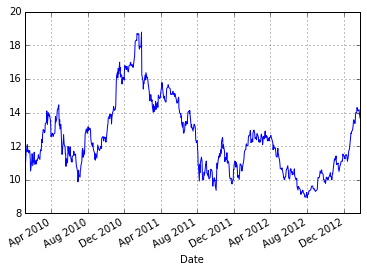

In [87]:
f.Close.plot()

In [88]:
f.Close['2011-01-27 00:00:00']

18.790001

In [89]:
BUFFER = 0.02

def find_index_of_MaxValue(df, col):
    return df[col].idxmax()
    pass

def find_index_of_RecentIndex(df):
    return df.sort_index(ascending=False).ix[0].name
    pass

def calculate_slope (df, col, startIndex, endIndex, duration):
    startValue = df.ix[startIndex][col]
    endValue = df.ix[endIndex][col]
    rise = endValue - startValue
    slope = rise / duration.days
    return slope

def help_calculate_trendPoint(startIndex, currentIndex, startValue, slope):
        mini_duration = currentIndex - startIndex
        trendPoint = startValue + int(mini_duration.days) * slope
        return trendPoint

def calculate_trendPoint (sliced_df, slope):
    startIndex = sliced_df.ix[0].name
    startValue = sliced_df.ix[0].Close
    sliced_df['trend'] = [help_calculate_trendPoint(startIndex=startIndex, 
                                                 currentIndex=x[1].name, 
                                                 startValue=startValue, 
                                                 slope=slope) 
                          for x in sliced_df.sort().iterrows()]
    
    return sliced_df

def slice_DF (df, start, end):
    return df[start:end]


def 

start = find_index_of_MaxValue(f, 'Close')
end = find_index_of_RecentIndex(f)
duration = end - start
slope = calculate_slope(df=f, col='Close', startIndex=start, endIndex=end, duration=duration )

sliced_f = slice_DF(f, start, end)

#sliced_f.iterrows()

sliced_f_with_trend = calculate_trendPoint(sliced_f, slope)
#[x[1].Close for x in sliced_f.iterrows()]

/Users/malcolm/anaconda/envs/py2/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
sliced_f_with_trend = sliced_f_with_trend.reset_index()
f = f.reset_index()
sliced_f_with_trend = sliced_f_with_trend[['trend', 'Date']]
#sliced_f_with_trend = sliced_f_with_trend.set_index('Date')

In [91]:
sliced_f_with_trend.head()

,trend,Date
0,18.790001,2011-01-27
1,18.782991,2011-01-28
2,18.761963,2011-01-31
3,18.754953,2011-02-01
4,18.747943,2011-02-02


In [92]:
#f = f.set_index('Date')
#del f['index']
len(f)
#f.head()

771

In [93]:
new = pd.merge(f,sliced_f_with_trend, how='left', on='Date')

In [100]:
len(new), len(f), len(sliced_f_with_trend)
new.set_index('Date', inplace=True)

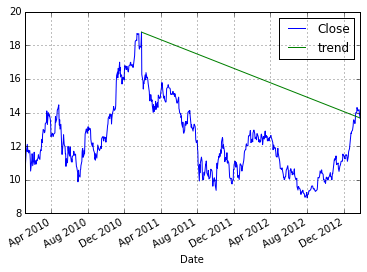

In [101]:

new[['Close', 'trend']].plot()

In [103]:
len(new[new.Close > new.trend])

10